In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-genetic-data/genetic_data_train.csv
/kaggle/input/human-genetic-data/genetic_data_test.csv


In [2]:
train = pd.read_csv('/kaggle/input/human-genetic-data/genetic_data_train.csv')
test = pd.read_csv('/kaggle/input/human-genetic-data/genetic_data_test.csv')

In [3]:
for col in train:
    if train[col].dtype == 'object':
        train[col] = train[col].factorize()[0]
        
for col in test:
    if test[col].dtype == 'object':
        test[col] = test[col].factorize()[0]

In [4]:
train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,0
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,0
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,0
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274,0
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274,0


array([[<Axes: title={'center': 'PC1'}>, <Axes: title={'center': 'PC2'}>,
        <Axes: title={'center': 'PC3'}>],
       [<Axes: title={'center': 'PC4'}>, <Axes: title={'center': 'PC5'}>,
        <Axes: title={'center': 'PC6'}>],
       [<Axes: title={'center': 'PC7'}>, <Axes: title={'center': 'PC8'}>,
        <Axes: title={'center': 'PC9'}>],
       [<Axes: title={'center': 'PC10'}>,
        <Axes: title={'center': 'Ancestry'}>, <Axes: >]], dtype=object)

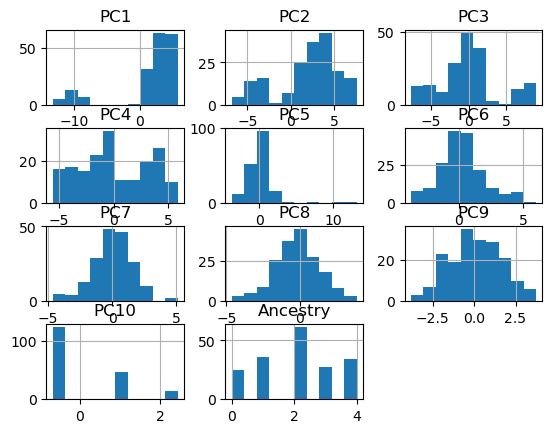

In [5]:
train.hist()

array([[<Axes: title={'center': 'PC1'}>, <Axes: title={'center': 'PC2'}>,
        <Axes: title={'center': 'PC3'}>],
       [<Axes: title={'center': 'PC4'}>, <Axes: title={'center': 'PC5'}>,
        <Axes: title={'center': 'PC6'}>],
       [<Axes: title={'center': 'PC7'}>, <Axes: title={'center': 'PC8'}>,
        <Axes: title={'center': 'PC9'}>],
       [<Axes: title={'center': 'PC10'}>,
        <Axes: title={'center': 'Ancestry'}>, <Axes: >]], dtype=object)

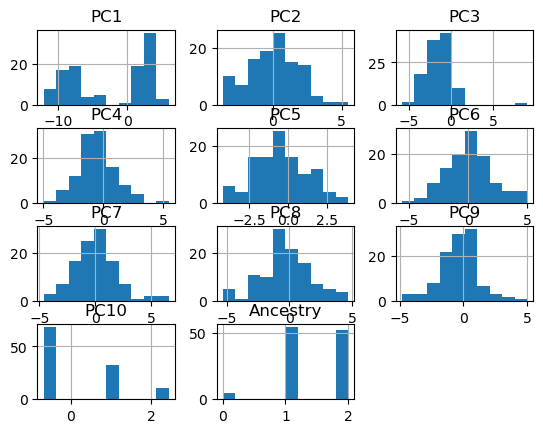

In [6]:
test.hist()

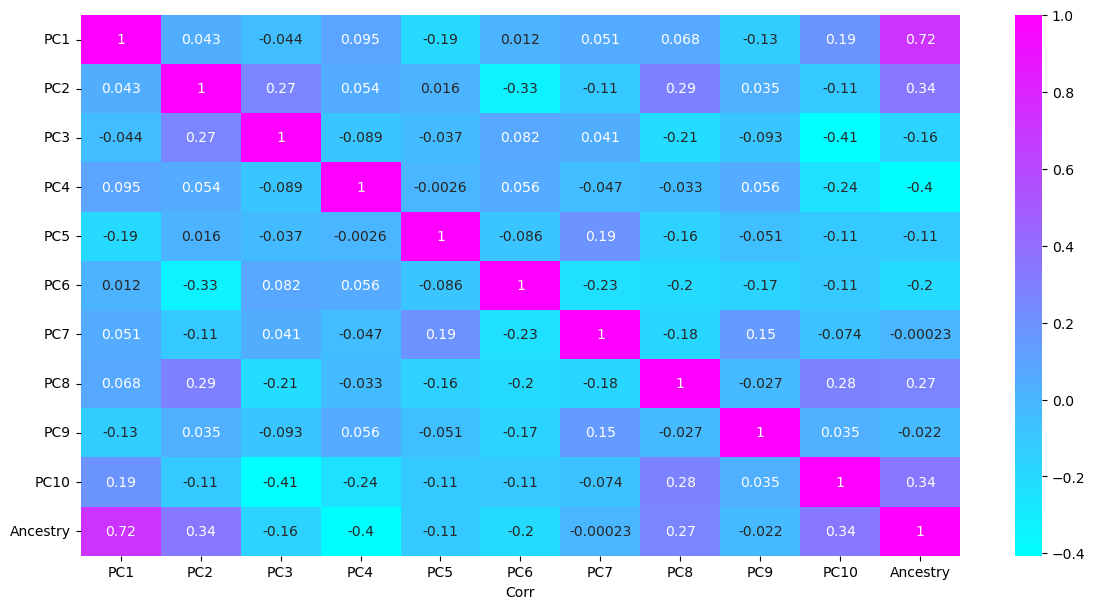

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

figure = plt.figure(figsize=(12, 6))
sns.heatmap(train.corr(), annot=True,cmap=plt.cm.cool)
plt.tight_layout()
plt.xlabel('Corr')
plt.show()

Goal: Predict Ancestry (Classification Problem)

In [8]:
set(train['Ancestry'])

{0, 1, 2, 3, 4}

In [9]:
X_train = train.loc[:,train.columns != 'Ancestry']
y_train = train['Ancestry']
X_test = test.loc[:,train.columns != 'Ancestry']
y_test = test['Ancestry']

Approach 1: Multi-Class Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
from sklearn.metrics import accuracy_score

model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

y_pred = cross_val_predict(model, X_test, y_test, cv=2)

print(accuracy_score(y_test, y_pred))

Mean Accuracy: 1.000 (0.000)
0.9369369369369369


In [11]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)

n_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

y_pred = cross_val_predict(clf, X_test, y_test, cv=2)
cv_results = cross_validate(clf, X_train, y_train, cv=3)

print(accuracy_score(y_test, y_pred))

Mean Accuracy: 0.980 (0.036)
0.9009009009009009
